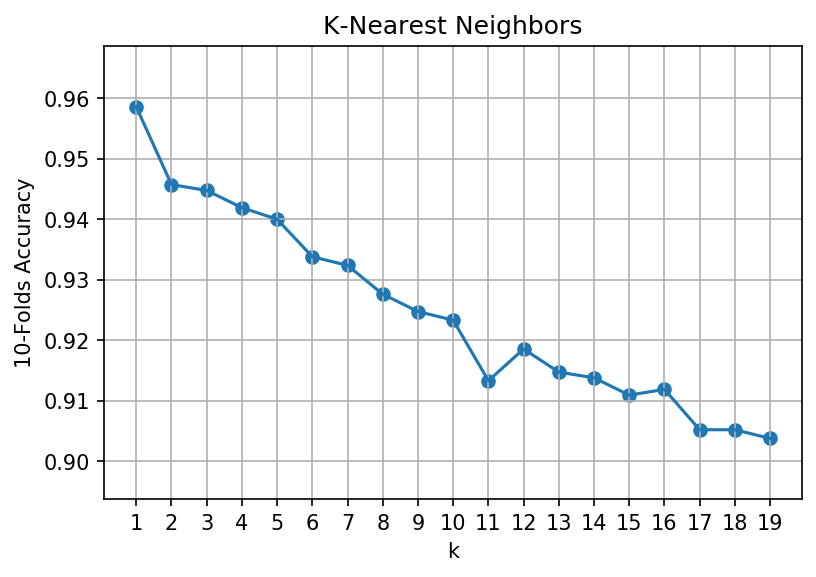

In [15]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold

%matplotlib inline

df = pd.read_csv('data/data.csv')

X = df[[c for c in df.keys()][1:]].values
y = df['CLASS'].values

kf = KFold(n_splits=10, random_state=0, shuffle=True)
kf.get_n_splits(X)

px = [x for x in range(1, 20)]
py = np.zeros((len(px),))
    
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    for k in range(1, 20):
        neigh = KNeighborsClassifier(n_neighbors=k)
        neigh.fit(X_train, y_train)
        score = neigh.score(X_test, y_test)
        py[k-1] += score
        
py /= 10
        
plt.figure(dpi=150)
plt.scatter(px, py)
plt.plot(px, py)
plt.grid()
plt.ylabel('10-Folds Accuracy')
plt.xlabel('k')
plt.xticks(px)
plt.title('K-Nearest Neighbors')
plt.savefig('knn.png')
plt.show()

